# Customer churn prediction is to measure why customers are leaving a business.<a href="#Customer-churn-prediction-is-to-measure-why-customers-are-leaving-a-business." class="anchor-link">¶</a>

In \[1\]:

    import pandas as pd
    from matplotlib import pyplot as plt
    import numpy as np

In \[2\]:

    df = pd.read_csv("C:/Users/Sanjay/Desktop/Customer churn prediction.csv")
    df.sample(5)

Out\[2\]:

|      | customerID | gender | SeniorCitizen | Partner | Dependents | tenure | PhoneService | MultipleLines | InternetService | OnlineSecurity      | ... | DeviceProtection    | TechSupport         | StreamingTV         | StreamingMovies     | Contract       | PaperlessBilling | PaymentMethod             | MonthlyCharges | TotalCharges | Churn |
|------|------------|--------|---------------|---------|------------|--------|--------------|---------------|-----------------|---------------------|-----|---------------------|---------------------|---------------------|---------------------|----------------|------------------|---------------------------|----------------|--------------|-------|
| 4689 | 2832-SCUCO | Female | 0             | No      | No         | 2      | Yes          | No            | No              | No internet service | ... | No internet service | No internet service | No internet service | No internet service | Month-to-month | No               | Electronic check          | 19.90          | 57.4         | No    |
| 5019 | 3320-VEOYC | Male   | 1             | No      | No         | 14     | Yes          | Yes           | Fiber optic     | No                  | ... | No                  | No                  | Yes                 | Yes                 | Month-to-month | Yes              | Electronic check          | 95.60          | 1273.3       | No    |
| 4876 | 5923-GXUOC | Male   | 0             | No      | No         | 10     | Yes          | No            | Fiber optic     | Yes                 | ... | Yes                 | No                  | Yes                 | Yes                 | Month-to-month | Yes              | Electronic check          | 104.40         | 1081.45      | Yes   |
| 1105 | 7363-QTBIW | Female | 0             | Yes     | No         | 9      | Yes          | No            | Fiber optic     | No                  | ... | No                  | No                  | No                  | Yes                 | Month-to-month | Yes              | Electronic check          | 79.75          | 769.1        | No    |
| 7013 | 1685-BQULA | Female | 0             | No      | No         | 40     | Yes          | Yes           | Fiber optic     | No                  | ... | Yes                 | No                  | Yes                 | No                  | Month-to-month | Yes              | Bank transfer (automatic) | 93.40          | 3756.4       | No    |

5 rows × 21 columns

In \[3\]:

    df.drop('customerID',axis='columns',inplace=True)

In \[4\]:

    df.dtypes

Out\[4\]:

    gender               object
    SeniorCitizen         int64
    Partner              object
    Dependents           object
    tenure                int64
    PhoneService         object
    MultipleLines        object
    InternetService      object
    OnlineSecurity       object
    OnlineBackup         object
    DeviceProtection     object
    TechSupport          object
    StreamingTV          object
    StreamingMovies      object
    Contract             object
    PaperlessBilling     object
    PaymentMethod        object
    MonthlyCharges      float64
    TotalCharges         object
    Churn                object
    dtype: object

In \[5\]:

    df.MonthlyCharges.values

Out\[5\]:

    array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In \[6\]:

    #Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column
    df.TotalCharges.values

Out\[6\]:

    array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
          dtype=object)

In \[7\]:

    #Ahh... it is string. Lets convert it to numbers
    pd.to_numeric(df.TotalCharges)

    ---------------------------------------------------------------------------
    ValueError                                Traceback (most recent call last)
    pandas\_libs\lib.pyx in pandas._libs.lib.maybe_convert_numeric()

    ValueError: Unable to parse string " "

    During handling of the above exception, another exception occurred:

    ValueError                                Traceback (most recent call last)
    <ipython-input-7-129be3e1404c> in <module>
          1 #Ahh... it is string. Lets convert it to numbers
    ----> 2 pd.to_numeric(df.TotalCharges)

    ~\anaconda3\lib\site-packages\pandas\core\tools\numeric.py in to_numeric(arg, errors, downcast)
        152         coerce_numeric = errors not in ("ignore", "raise")
        153         try:
    --> 154             values = lib.maybe_convert_numeric(
        155                 values, set(), coerce_numeric=coerce_numeric
        156             )

    pandas\_libs\lib.pyx in pandas._libs.lib.maybe_convert_numeric()

    ValueError: Unable to parse string " " at position 488

In \[8\]:

    #Hmmm... some values seems to be not numbers but blank string. Let's find out such rows
    pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
    #coerce will change empty string to NA

Out\[8\]:

    0       False
    1       False
    2       False
    3       False
    4       False
            ...  
    7038    False
    7039    False
    7040    False
    7041    False
    7042    False
    Name: TotalCharges, Length: 7043, dtype: bool

In \[9\]:

    df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

Out\[9\]:

|      | gender | SeniorCitizen | Partner | Dependents | tenure | PhoneService | MultipleLines    | InternetService | OnlineSecurity      | OnlineBackup        | DeviceProtection    | TechSupport         | StreamingTV         | StreamingMovies     | Contract | PaperlessBilling | PaymentMethod             | MonthlyCharges | TotalCharges | Churn |
|------|--------|---------------|---------|------------|--------|--------------|------------------|-----------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|----------|------------------|---------------------------|----------------|--------------|-------|
| 488  | Female | 0             | Yes     | Yes        | 0      | No           | No phone service | DSL             | Yes                 | No                  | Yes                 | Yes                 | Yes                 | No                  | Two year | Yes              | Bank transfer (automatic) | 52.55          |              | No    |
| 753  | Male   | 0             | No      | Yes        | 0      | Yes          | No               | No              | No internet service | No internet service | No internet service | No internet service | No internet service | No internet service | Two year | No               | Mailed check              | 20.25          |              | No    |
| 936  | Female | 0             | Yes     | Yes        | 0      | Yes          | No               | DSL             | Yes                 | Yes                 | Yes                 | No                  | Yes                 | Yes                 | Two year | No               | Mailed check              | 80.85          |              | No    |
| 1082 | Male   | 0             | Yes     | Yes        | 0      | Yes          | Yes              | No              | No internet service | No internet service | No internet service | No internet service | No internet service | No internet service | Two year | No               | Mailed check              | 25.75          |              | No    |
| 1340 | Female | 0             | Yes     | Yes        | 0      | No           | No phone service | DSL             | Yes                 | Yes                 | Yes                 | Yes                 | Yes                 | No                  | Two year | No               | Credit card (automatic)   | 56.05          |              | No    |
| 3331 | Male   | 0             | Yes     | Yes        | 0      | Yes          | No               | No              | No internet service | No internet service | No internet service | No internet service | No internet service | No internet service | Two year | No               | Mailed check              | 19.85          |              | No    |
| 3826 | Male   | 0             | Yes     | Yes        | 0      | Yes          | Yes              | No              | No internet service | No internet service | No internet service | No internet service | No internet service | No internet service | Two year | No               | Mailed check              | 25.35          |              | No    |
| 4380 | Female | 0             | Yes     | Yes        | 0      | Yes          | No               | No              | No internet service | No internet service | No internet service | No internet service | No internet service | No internet service | Two year | No               | Mailed check              | 20.00          |              | No    |
| 5218 | Male   | 0             | Yes     | Yes        | 0      | Yes          | No               | No              | No internet service | No internet service | No internet service | No internet service | No internet service | No internet service | One year | Yes              | Mailed check              | 19.70          |              | No    |
| 6670 | Female | 0             | Yes     | Yes        | 0      | Yes          | Yes              | DSL             | No                  | Yes                 | Yes                 | Yes                 | Yes                 | No                  | Two year | No               | Mailed check              | 73.35          |              | No    |
| 6754 | Male   | 0             | No      | Yes        | 0      | Yes          | Yes              | DSL             | Yes                 | Yes                 | No                  | Yes                 | No                  | No                  | Two year | Yes              | Bank transfer (automatic) | 61.90          |              | No    |

In \[10\]:

    df.shape

Out\[10\]:

    (7043, 20)

In \[11\]:

    df.iloc[488].TotalCharges

Out\[11\]:

    ' '

In \[12\]:

    df[df.TotalCharges!=' '].shape #keep all record except TC=''

Out\[12\]:

    (7032, 20)

In \[13\]:

    df1 = df[df.TotalCharges!=' ']
    df1.shape

Out\[13\]:

    (7032, 20)

In \[14\]:

    df1.dtypes

Out\[14\]:

    gender               object
    SeniorCitizen         int64
    Partner              object
    Dependents           object
    tenure                int64
    PhoneService         object
    MultipleLines        object
    InternetService      object
    OnlineSecurity       object
    OnlineBackup         object
    DeviceProtection     object
    TechSupport          object
    StreamingTV          object
    StreamingMovies      object
    Contract             object
    PaperlessBilling     object
    PaymentMethod        object
    MonthlyCharges      float64
    TotalCharges         object
    Churn                object
    dtype: object

In \[15\]:

    df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

    C:\Users\Sanjay\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      self[name] = value

In \[16\]:

    df1.TotalCharges.values

Out\[16\]:

    array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In \[17\]:

    df1[df1.Churn=='No']

Out\[17\]:

|      | gender | SeniorCitizen | Partner | Dependents | tenure | PhoneService | MultipleLines    | InternetService | OnlineSecurity      | OnlineBackup        | DeviceProtection    | TechSupport         | StreamingTV         | StreamingMovies     | Contract       | PaperlessBilling | PaymentMethod             | MonthlyCharges | TotalCharges | Churn |
|------|--------|---------------|---------|------------|--------|--------------|------------------|-----------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|----------------|------------------|---------------------------|----------------|--------------|-------|
| 0    | Female | 0             | Yes     | No         | 1      | No           | No phone service | DSL             | No                  | Yes                 | No                  | No                  | No                  | No                  | Month-to-month | Yes              | Electronic check          | 29.85          | 29.85        | No    |
| 1    | Male   | 0             | No      | No         | 34     | Yes          | No               | DSL             | Yes                 | No                  | Yes                 | No                  | No                  | No                  | One year       | No               | Mailed check              | 56.95          | 1889.50      | No    |
| 3    | Male   | 0             | No      | No         | 45     | No           | No phone service | DSL             | Yes                 | No                  | Yes                 | Yes                 | No                  | No                  | One year       | No               | Bank transfer (automatic) | 42.30          | 1840.75      | No    |
| 6    | Male   | 0             | No      | Yes        | 22     | Yes          | Yes              | Fiber optic     | No                  | Yes                 | No                  | No                  | Yes                 | No                  | Month-to-month | Yes              | Credit card (automatic)   | 89.10          | 1949.40      | No    |
| 7    | Female | 0             | No      | No         | 10     | No           | No phone service | DSL             | Yes                 | No                  | No                  | No                  | No                  | No                  | Month-to-month | No               | Mailed check              | 29.75          | 301.90       | No    |
| ...  | ...    | ...           | ...     | ...        | ...    | ...          | ...              | ...             | ...                 | ...                 | ...                 | ...                 | ...                 | ...                 | ...            | ...              | ...                       | ...            | ...          | ...   |
| 7037 | Female | 0             | No      | No         | 72     | Yes          | No               | No              | No internet service | No internet service | No internet service | No internet service | No internet service | No internet service | Two year       | Yes              | Bank transfer (automatic) | 21.15          | 1419.40      | No    |
| 7038 | Male   | 0             | Yes     | Yes        | 24     | Yes          | Yes              | DSL             | Yes                 | No                  | Yes                 | Yes                 | Yes                 | Yes                 | One year       | Yes              | Mailed check              | 84.80          | 1990.50      | No    |
| 7039 | Female | 0             | Yes     | Yes        | 72     | Yes          | Yes              | Fiber optic     | No                  | Yes                 | Yes                 | No                  | Yes                 | Yes                 | One year       | Yes              | Credit card (automatic)   | 103.20         | 7362.90      | No    |
| 7040 | Female | 0             | Yes     | Yes        | 11     | No           | No phone service | DSL             | Yes                 | No                  | No                  | No                  | No                  | No                  | Month-to-month | Yes              | Electronic check          | 29.60          | 346.45       | No    |
| 7042 | Male   | 0             | No      | No         | 66     | Yes          | No               | Fiber optic     | Yes                 | No                  | Yes                 | Yes                 | Yes                 | Yes                 | Two year       | Yes              | Bank transfer (automatic) | 105.65         | 6844.50      | No    |

5163 rows × 20 columns

In \[18\]:

    tenure_churn_no = df1[df1.Churn=='No'].tenure
    tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
    plt.xlabel("tenure")
    plt.ylabel("Number Of Customers")
    plt.title("Customer Churn Prediction Visualiztion")
    plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
    plt.legend()

Out\[18\]:

    <matplotlib.legend.Legend at 0x9492838>

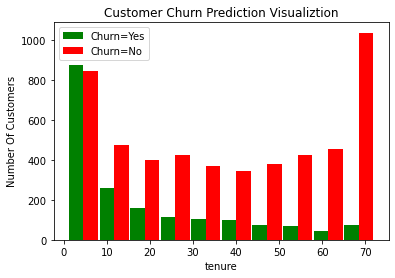

In \[19\]:

    mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
    mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
    plt.xlabel("Monthly Charges")
    plt.ylabel("Number Of Customers")
    plt.title("Customer Churn Prediction Visualiztion")
    plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
    plt.legend()

Out\[19\]:

    <matplotlib.legend.Legend at 0x94cfa78>

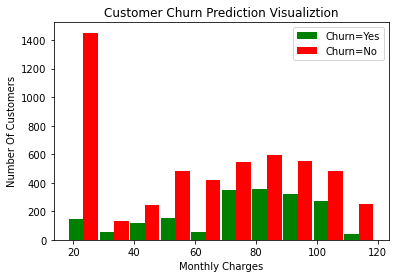

In \[20\]:

    for column in df:
         print(f'{column}:{df[column].unique()}')

    gender:['Female' 'Male']
    SeniorCitizen:[0 1]
    Partner:['Yes' 'No']
    Dependents:['No' 'Yes']
    tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
      5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
     32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
     39]
    PhoneService:['No' 'Yes']
    MultipleLines:['No phone service' 'No' 'Yes']
    InternetService:['DSL' 'Fiber optic' 'No']
    OnlineSecurity:['No' 'Yes' 'No internet service']
    OnlineBackup:['Yes' 'No' 'No internet service']
    DeviceProtection:['No' 'Yes' 'No internet service']
    TechSupport:['No' 'Yes' 'No internet service']
    StreamingTV:['No' 'Yes' 'No internet service']
    StreamingMovies:['No' 'Yes' 'No internet service']
    Contract:['Month-to-month' 'One year' 'Two year']
    PaperlessBilling:['Yes' 'No']
    PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
     'Credit card (automatic)']
    MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
    TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
    Churn:['No' 'Yes']

In \[21\]:

    def print_unique_col_values(df):
           for column in df:
                if df[column].dtypes=='object':
                    print(f'{column}: {df[column].unique()}')

In \[22\]:

    print_unique_col_values(df1)

    gender: ['Female' 'Male']
    Partner: ['Yes' 'No']
    Dependents: ['No' 'Yes']
    PhoneService: ['No' 'Yes']
    MultipleLines: ['No phone service' 'No' 'Yes']
    InternetService: ['DSL' 'Fiber optic' 'No']
    OnlineSecurity: ['No' 'Yes' 'No internet service']
    OnlineBackup: ['Yes' 'No' 'No internet service']
    DeviceProtection: ['No' 'Yes' 'No internet service']
    TechSupport: ['No' 'Yes' 'No internet service']
    StreamingTV: ['No' 'Yes' 'No internet service']
    StreamingMovies: ['No' 'Yes' 'No internet service']
    Contract: ['Month-to-month' 'One year' 'Two year']
    PaperlessBilling: ['Yes' 'No']
    PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
     'Credit card (automatic)']
    Churn: ['No' 'Yes']

In \[23\]:

    df1.replace('No internet service','No',inplace=True)
    df1.replace('No phone service','No',inplace=True)

    C:\Users\Sanjay\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      return super().replace(

In \[24\]:

    print_unique_col_values(df1)

    gender: ['Female' 'Male']
    Partner: ['Yes' 'No']
    Dependents: ['No' 'Yes']
    PhoneService: ['No' 'Yes']
    MultipleLines: ['No' 'Yes']
    InternetService: ['DSL' 'Fiber optic' 'No']
    OnlineSecurity: ['No' 'Yes']
    OnlineBackup: ['Yes' 'No']
    DeviceProtection: ['No' 'Yes']
    TechSupport: ['No' 'Yes']
    StreamingTV: ['No' 'Yes']
    StreamingMovies: ['No' 'Yes']
    Contract: ['Month-to-month' 'One year' 'Two year']
    PaperlessBilling: ['Yes' 'No']
    PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
     'Credit card (automatic)']
    Churn: ['No' 'Yes']

In \[25\]:

    yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                      'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in yes_no_columns:
        df1[col].replace({'Yes': 1,'No': 0},inplace=True)

    C:\Users\Sanjay\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      return super().replace(

In \[26\]:

    df1['gender'].replace({'Female':0,'Male':1},inplace=True)

In \[27\]:

    for col in df1:
        print(f'{col}: {df1[col].unique()}')

    gender: [0 1]
    SeniorCitizen: [0 1]
    Partner: [1 0]
    Dependents: [0 1]
    tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
      5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
     32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
    PhoneService: [0 1]
    MultipleLines: [0 1]
    InternetService: ['DSL' 'Fiber optic' 'No']
    OnlineSecurity: [0 1]
    OnlineBackup: [1 0]
    DeviceProtection: [0 1]
    TechSupport: [0 1]
    StreamingTV: [0 1]
    StreamingMovies: [0 1]
    Contract: ['Month-to-month' 'One year' 'Two year']
    PaperlessBilling: [1 0]
    PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
     'Credit card (automatic)']
    MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
    TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
    Churn: [0 1]

In \[28\]:

    df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
    df2.columns

Out\[28\]:

    Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
           'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
           'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
           'InternetService_DSL', 'InternetService_Fiber optic',
           'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
           'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
           'PaymentMethod_Credit card (automatic)',
           'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
          dtype='object')

In \[29\]:

    df2.sample(5)

Out\[29\]:

|      | gender | SeniorCitizen | Partner | Dependents | tenure | PhoneService | MultipleLines | OnlineSecurity | OnlineBackup | DeviceProtection | ... | InternetService_DSL | InternetService_Fiber optic | InternetService_No | Contract_Month-to-month | Contract_One year | Contract_Two year | PaymentMethod_Bank transfer (automatic) | PaymentMethod_Credit card (automatic) | PaymentMethod_Electronic check | PaymentMethod_Mailed check |
|------|--------|---------------|---------|------------|--------|--------------|---------------|----------------|--------------|------------------|-----|---------------------|-----------------------------|--------------------|-------------------------|-------------------|-------------------|-----------------------------------------|---------------------------------------|--------------------------------|----------------------------|
| 638  | 1      | 1             | 1       | 1          | 56     | 1            | 1             | 1              | 0            | 1                | ... | 0                   | 1                           | 0                  | 0                       | 1                 | 0                 | 1                                       | 0                                     | 0                              | 0                          |
| 3800 | 0      | 0             | 0       | 1          | 66     | 1            | 1             | 1              | 0            | 1                | ... | 0                   | 1                           | 0                  | 0                       | 0                 | 1                 | 0                                       | 1                                     | 0                              | 0                          |
| 3162 | 1      | 0             | 0       | 0          | 19     | 1            | 1             | 0              | 0            | 0                | ... | 1                   | 0                           | 0                  | 1                       | 0                 | 0                 | 0                                       | 0                                     | 0                              | 1                          |
| 2469 | 0      | 0             | 0       | 0          | 29     | 1            | 0             | 0              | 0            | 0                | ... | 0                   | 0                           | 1                  | 0                       | 1                 | 0                 | 0                                       | 0                                     | 0                              | 1                          |
| 4615 | 0      | 0             | 1       | 0          | 72     | 1            | 1             | 1              | 1            | 0                | ... | 1                   | 0                           | 0                  | 0                       | 0                 | 1                 | 1                                       | 0                                     | 0                              | 0                          |

5 rows × 27 columns

In \[30\]:

    df2.dtypes

Out\[30\]:

    gender                                       int64
    SeniorCitizen                                int64
    Partner                                      int64
    Dependents                                   int64
    tenure                                       int64
    PhoneService                                 int64
    MultipleLines                                int64
    OnlineSecurity                               int64
    OnlineBackup                                 int64
    DeviceProtection                             int64
    TechSupport                                  int64
    StreamingTV                                  int64
    StreamingMovies                              int64
    PaperlessBilling                             int64
    MonthlyCharges                             float64
    TotalCharges                               float64
    Churn                                        int64
    InternetService_DSL                          uint8
    InternetService_Fiber optic                  uint8
    InternetService_No                           uint8
    Contract_Month-to-month                      uint8
    Contract_One year                            uint8
    Contract_Two year                            uint8
    PaymentMethod_Bank transfer (automatic)      uint8
    PaymentMethod_Credit card (automatic)        uint8
    PaymentMethod_Electronic check               uint8
    PaymentMethod_Mailed check                   uint8
    dtype: object

In \[31\]:

    cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In \[32\]:

    for col in df2:
        print(f'{col}: {df2[col].unique()}')

    gender: [0 1]
    SeniorCitizen: [0 1]
    Partner: [1 0]
    Dependents: [0 1]
    tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
     0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
     0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
     0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
     0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
     0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
     0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
     0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
     0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
     0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
     0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
     0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
    PhoneService: [0 1]
    MultipleLines: [0 1]
    OnlineSecurity: [0 1]
    OnlineBackup: [1 0]
    DeviceProtection: [0 1]
    TechSupport: [0 1]
    StreamingTV: [0 1]
    StreamingMovies: [0 1]
    PaperlessBilling: [1 0]
    MonthlyCharges: [0.11542289 0.38507463 0.35422886 ... 0.44626866 0.25820896 0.60149254]
    TotalCharges: [0.0012751  0.21586661 0.01031041 ... 0.03780868 0.03321025 0.78764136]
    Churn: [0 1]
    InternetService_DSL: [1 0]
    InternetService_Fiber optic: [0 1]
    InternetService_No: [0 1]
    Contract_Month-to-month: [1 0]
    Contract_One year: [0 1]
    Contract_Two year: [0 1]
    PaymentMethod_Bank transfer (automatic): [0 1]
    PaymentMethod_Credit card (automatic): [0 1]
    PaymentMethod_Electronic check: [1 0]
    PaymentMethod_Mailed check: [0 1]

In \[33\]:

    X = df2.drop('Churn',axis='columns')
    y = df2['Churn']

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In \[34\]:

    X_train.shape

Out\[34\]:

    (5625, 26)

In \[35\]:

    X_test.shape

Out\[35\]:

    (1407, 26)

In \[ \]:

    import tensorflow as tf
    from tensorflow import keras


    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=100)

In \[ \]:

    model.evaluate(X_test, y_test)

In \[ \]:

    yp = model.predict(X_test)
    yp[:5]

In \[ \]:

    y_pred = []
    for element in yp:
        if element > 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)

In \[ \]:

    y_pred[:10]

In \[ \]:

    y_test[:10]

In \[ \]:

    from sklearn.metrics import confusion_matrix , classification_report

    print(classification_report(y_test,y_pred))

In \[ \]:

    import seaborn as sn
    cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

In \[37\]:

    #Accuracy
    round((862+229)/(862+229+137+179),2)

Out\[37\]:

    0.78

In \[38\]:

    #Precision for 0 class. i.e. Precision for customers who did not churn

    round(862/(862+179),2)

Out\[38\]:

    0.83

In \[39\]:

    #Recall for 0 class
    round(862/(862+137),2)

Out\[39\]:

    0.86